In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

***
***
# GiveWell Cost Effectiveness Analysis Background
***
***

## Main Parameters:
* Non-normative judgments, i.e. "cost per desirable outcome"
* Moral weights, i.e. do you care more about avoiding illness or saving a life

## Choosing Outcomes:
* Each intervention could have outcome(s) of saving lives, raising incomes, and/or improving short-term health
* If it does any or all, consider including the outcome(s) in the model of the interventions overall impact
* Include an outcome if it:
    * Has meaningful effect on a program's overall cost-effectiveness
    * Effects on the modeled outcome are easy to justify based on empirical research or plausible theoretical mechanisms
    * It's possible to estimate an effect on the outcome without an outrageously complex model
    * Including the outcome will be consistent with the approaches used in our CEAs for other programs

## Evaluating Outcomes of an Intervention
* Each outcome of the intervention is evaluated for effectiveness based on the best research available
* Adjustment Factors (multiply the study results by any adjustment parameters you deem relevant to get adjusted results):
    * Internal validity parameters capture the possible inaccuracy of the studies results due to bias and other errors
    * External validity parameters capture the possible inaccuracy in mapping the effect of an intervention on to a different setting/population
    * Coverage rate (coverage_rate) is the proportion of the group intended to be treated that accepted and/or completed treatment. Studies either measure effects of treatment on the treated (effect_on_treated) or, more often, effect on the whole group that was intended to be treated (effect_intended_group).
      * When given effect_on_treated (TOT): **effect_intended_group = effect_on_treated * coverage_rate**
      * When given effect_intended_group (ITT): **effect_on_treated ~= effect_intended_group / coverage_rate** (as long as treatment did not affect people who were intended to be treated but weren't)
    * Base rate adjustments account for the fact that if a new population has different base rates than the population originally studied, the same intervention might not be proportional to the original study. E.g. a population that goes from 10 to 8 in 1000 child mortaility rates with the addition of vitamins DOES NOT imply that a different population would go from 5 to 4 in 1000 child mortalities with vitamins there. They had different base rates (10/1000 and 5/1000), which might say something about their underlying sensitivity to vitamins. Hard to determine these factors...
         * The Global Burden of Disease (GBD) database has a number of base rates for diseases, although this is complicated by the fact that they only attribute one cause to a death when in fact causes are correlated
    * If an intervention has been running for several years, it may be relevant to inflate the baseline data when examining marginal effect of continuing the intervention to account for the fact the intervention affects last year's data
  

## Consumption and Income
* Change in consumption is the better thing to measure than change in income. They are related logarithmically.
* For households, there is some complexity between a households increase in income/consumption and their individual increase in income/consumption. This analysis has determined an approximate correction factor of 2: https://docs.google.com/spreadsheets/d/112uuyYt6QLRZuJojwz6fHv4JQ-GHNeIpiT-SauY3kmM/edit#gid=0. This accounts for the fact that if a single person in a household increases their income by 10%, this effectively increases EVERYONE's income by 10%, so consumption should actually go up more than expected.

In [12]:
def plot_consumption_income(linlog=False):
    max_x = 5
    x = np.linspace(1, max_x, 1000)
    y_linear = x
    y_log = np.log(x) + 1 # plus one because ln(1) = 0

    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title("Modeling Consumption, Income and Wellbeing", fontsize=20)
    ax.set_xlabel("Income Increases By", fontsize=18)
    ax.set_ylabel("Consumption Increases By", fontsize=18)

    ax.plot(x, y_linear, label="Linear")
    ax.plot(x, y_log, label="Logarithmic")
    ax.axvline(1, color="k", ls=":", label="No Change in Income")

    xstep = 0.5
    xticks = np.arange(1, max_x+xstep, xstep)
    xticklabels = [str(x) + "X" for x in xticks]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    ystep = 0.5
    yticks = np.arange(0, max_x+ystep, ystep)
    yticklabels = [str(y) + "X" for y in yticks]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)

    ax.set_ylim(1, 4)
    ax.grid(True)
    ax.legend(loc=2, fontsize=14)
    if linlog: ax.set_xscale("log")

    plt.tight_layout();

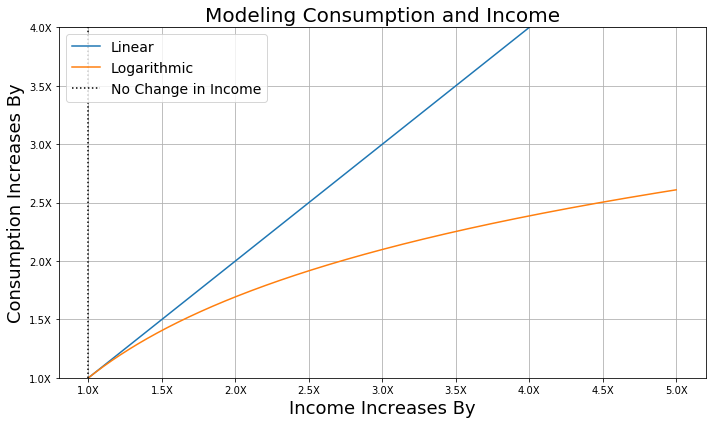

In [13]:
plot_consumption_income(linlog=False)

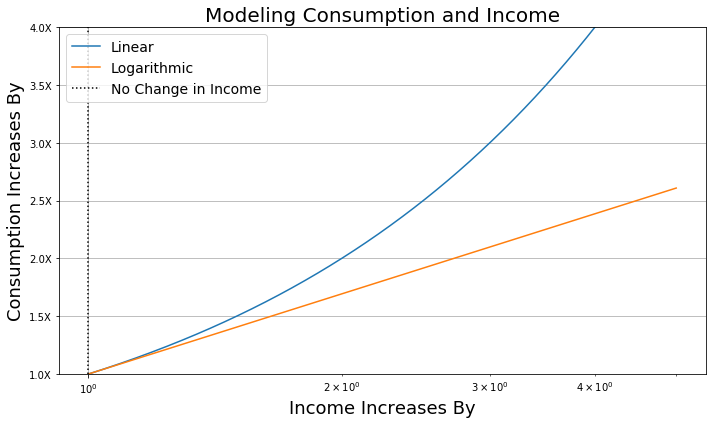

In [14]:
plot_consumption_income(linlog=True)

In [15]:
# for CORRECTION_FACTOR in (1.1, 1.4, 1.8, 2., 2.2, 2.5, 2.8, 3.3, 3.8, 4.5, 5):
#     max_x = 5
#     x = np.linspace(1, max_x, 1000)
#     y_linear = x
#     y_log = np.log(x) + 1 # plus one because ln(1) = 0
#     y_log_corrected_div = np.log(x) / np.log(CORRECTION_FACTOR) + 1 # plus one because ln(1) = 0
#     y_log_corrected_mult = np.log(x) * CORRECTION_FACTOR + 1 # plus one because ln(1) = 0

#     fig, ax = plt.subplots(figsize=(10,6))
#     ax.set_title("Modeling Consumption and Income (Mult={})".format(str(CORRECTION_FACTOR)), fontsize=20)
#     ax.set_xlabel("Multiply Income By", fontsize=18)
#     ax.set_ylabel("Multiply Consumption By", fontsize=18)

#     ax.plot(x, y_linear, label="Linear (unreasonable)")
#     ax.plot(x, y_log, label="Logarithmic")
#     ax.plot(x, y_log_corrected_div, label="Household (Divide)")
#     ax.plot(x, y_log_corrected_mult, label="Household (Multiply)")
#     ax.axvline(1, color="k", ls=":", label="No Change in Income")

#     xstep = 0.5
#     xticks = np.arange(1, max_x+xstep, xstep)
#     xticklabels = [str(x) + "X" for x in xticks]
#     ax.set_xticks(xticks)
#     ax.set_xticklabels(xticklabels)

#     ystep = 0.5
#     yticks = np.arange(0, max_x+ystep, ystep)
#     yticklabels = [str(y) + "X" for y in yticks]
#     ax.set_yticks(yticks)
#     ax.set_yticklabels(yticklabels)

#     ax.set_ylim(1, 4)
#     ax.grid(True)
#     ax.legend(loc=2, fontsize=14)

#     plt.tight_layout();

## Discounting:
* Long-term health benefits (e.g. deworming will have health benefits 30 years in the future) are discounted at some discount rate, just like future financial gains are discounted. This serves to reward immediate health improvements when compared with health improvements that take longer.

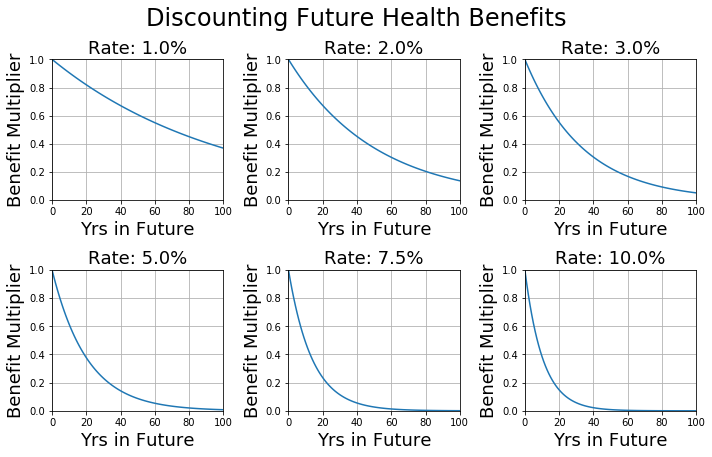

In [16]:
yrs = np.arange(0, 101)

discount_rates = np.array([
    [0.01, 0.02, 0.03],
    [0.05, 0.075, 0.1]
])

nrows = discount_rates.shape[0]
ncols = discount_rates.shape[1]
discount_rates = np.ravel(discount_rates)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
axs = np.ravel(ax)

for ii, ax in enumerate(axs):
    dr = discount_rates[ii]
    discounted_benefit = 1 / (1 + dr)**yrs
    
    ax.plot(yrs, discounted_benefit)

    ax.set_ylim(0, 1)
    ax.set_xlim(0, 100)
    ax.grid(True)
    
    ax.set_title("Rate: {}%".format(str(dr*100)), fontsize=18)
    ax.set_ylabel("Benefit Multiplier", fontsize=18)
    ax.set_xlabel("Yrs in Future", fontsize=18)
    
fig.suptitle("Discounting Future Health Benefits", fontsize=24, y=1.05)
plt.tight_layout()

## Financial Adjustments
* Convert purchasing power adjusted units to USD as soon as possible in the CEA
* Convert foreign dollars to USD at the market price, using past rates when necessary
* Inflation adjustments are difficult as intervention cost (the value of people's time and the cost of health commodities) isn't necessarily correlated with the US consumer price index
* Sometimes GiveWell funding can influence the actions of other funders
    * Leveraging - GiveWell donations cause other donors to give more
    * Funging - GiveWell donations cause other donors to give less

## Overall Goal: Cost per Outcome
* From there, easy to multiply by moral weight related and normalize to \$10,000 to get **Value per \$10,000**
    * If an intervention has multiple outcomes, sum all Value per \$10,000 figures to get total value of intervention

***
***
# Moral Weights

In [17]:
df_moral = pd.read_csv('./givewell_moral_weights.csv')
relative_col = 'value_doubling_consumption_per_year'
df_moral

,staff_member,value_doubling_consumption_per_year,value_averting_death_under_5_years,vallue_averting_death_over_5_years,value_averting_death_3_to_59_months,value_averting_death_6_to_59_months
0,Amar,1.000,43,30.0,43.0,43.0
1,Andrew,0.270,8,32.0,9.0,9.0
2,Caitlin,1.000,80,80.0,80.0,80.0
3,Dan,0.500,20,37.0,20.0,20.0
4,Elie,0.015,1,1.9,1.2,1.3
5,Holden,0.330,15,46.0,15.0,15.0
6,Isabel,1.000,50,80.0,50.0,50.0
7,James,0.580,43,46.0,43.0,43.0
8,Josh,0.250,10,20.0,11.0,11.0
9,Natalie,1.000,50,100.0,50.0,50.0


In [18]:
outcome_title = {
    'value_doubling_consumption_per_year': 'Doubling Consumption/yr',
    'value_averting_death_under_5_years': 'Averting Death <= 5yrs',
    'vallue_averting_death_over_5_years': 'Averting Death > 5yrs',
    'value_averting_death_3_to_59_months': 'Averting Death 3-59mos',
    'value_averting_death_6_to_59_months': 'Averting Death 6-59mos',
}

In [19]:
# outcomes = [c for c in df_moral.columns if c != 'staff_member']
# staff_members = df_moral['staff_member'].values
# relative_vals = df_moral[relative_col].values
# for outcome in outcomes:
#     weights = df_moral[outcome].values / relative_vals
    
#     fig, ax = plt.subplots(figsize=(6,5))
#     ax.grid(True)
#     ax.set_title("Moral Weight of " + outcome_title[outcome], fontsize=16)
#     ax.set_ylabel("Relative to {}".format(outcome_title[relative_col]), fontsize=14)
    
#     ax.boxplot(weights)
#     ax.set_xticks([])
#     ax.set_ylim(ymin=0)
    
#     for staff, weight in zip(staff_members, weights):
#         ax.plot([1], [weight], ls="", marker="_", markersize=20)
#         ax.text(1.08, weight*0.99, staff)

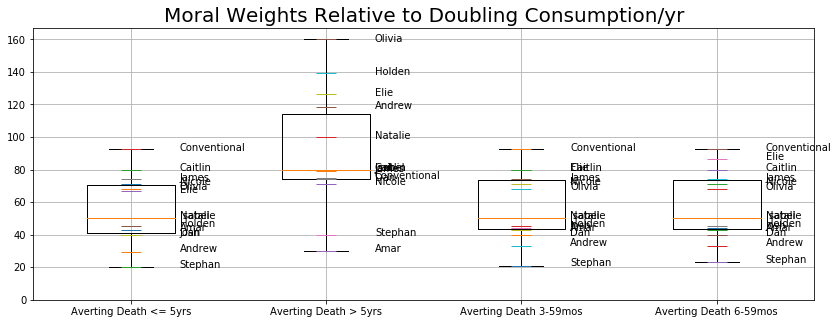

In [20]:
outcomes = [c for c in df_moral.columns if c != 'staff_member']
staff_members = df_moral['staff_member'].values
relative_vals = df_moral[relative_col].values

boxplots, xticklabels = [], []
for outcome in outcomes:
    if outcome == relative_col: continue
    weights = df_moral[outcome].values / relative_vals
    boxplots.append(weights)
    xticklabels.append(outcome_title[outcome])
    
fig, ax = plt.subplots(figsize=(14,5))
ax.grid(True)
ax.set_title("Moral Weights Relative to {}".format(outcome_title[relative_col]), fontsize=20)

ax.boxplot(boxplots)
ax.set_xticklabels(xticklabels)
ax.set_ylim(ymin=0)

for ii, data in enumerate(boxplots):
    for staff, weight in zip(staff_members, data):
        ax.plot([1+ii], [weight], ls="", marker="_", markersize=20)
        ax.text(ii + 1.25, weight*0.99, staff, fontsize=10)